In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('loan_prediction.csv')
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
df = df.drop('Loan_ID', axis=1)

In [5]:
df.isnull().sum() 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [12]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    if not df[col].mode().empty:   # check if mode exists
        df[col] = df[col].fillna(df[col].mode().iloc[0])
    else:
        df[col] = df[col].fillna("Unknown")  # or any default value


In [13]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [16]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# Fill missing values in LoanAmount with the median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# Fill missing values in Loan_Amount_Term with the mode
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# Fill missing values in Credit_History with the mode
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [18]:
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


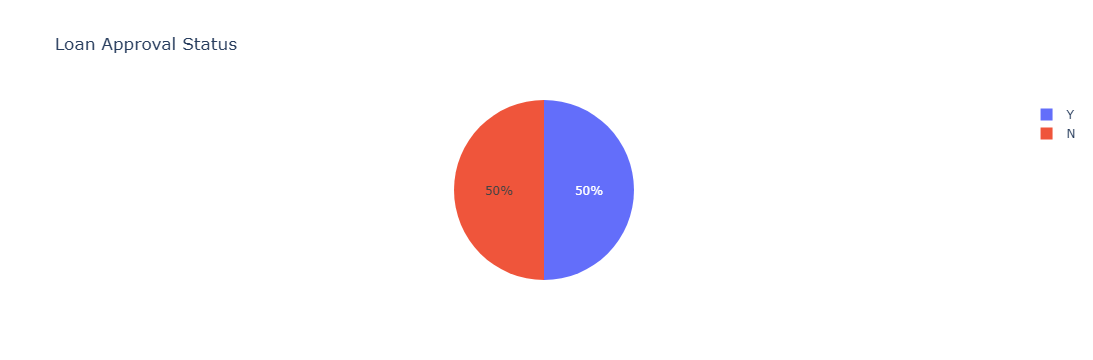

In [19]:
import plotly.express as px

loan_status_count = df['Loan_Status'].value_counts()
fig_loan_status = px.pie(loan_status_count, 
                         names=loan_status_count.index, 
                         title='Loan Approval Status')
fig_loan_status.show()

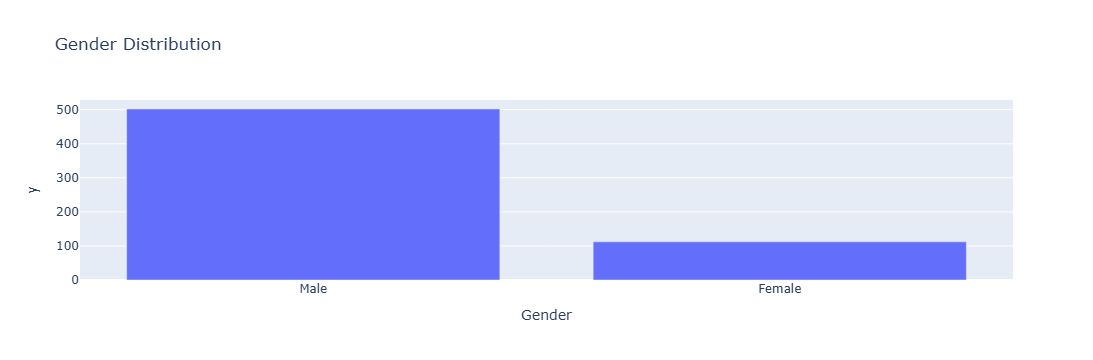

In [20]:
gender_count = df['Gender'].value_counts()
fig_gender = px.bar(gender_count, 
                    x=gender_count.index, 
                    y=gender_count.values, 
                    title='Gender Distribution')
fig_gender.show()

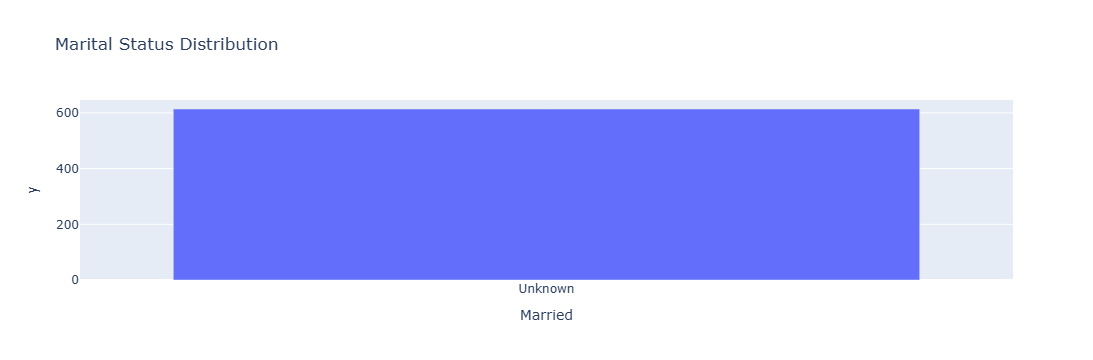

In [21]:
married_count = df['Married'].value_counts()
fig_married = px.bar(married_count, 
                     x=married_count.index, 
                     y=married_count.values, 
                     title='Marital Status Distribution')
fig_married.show()

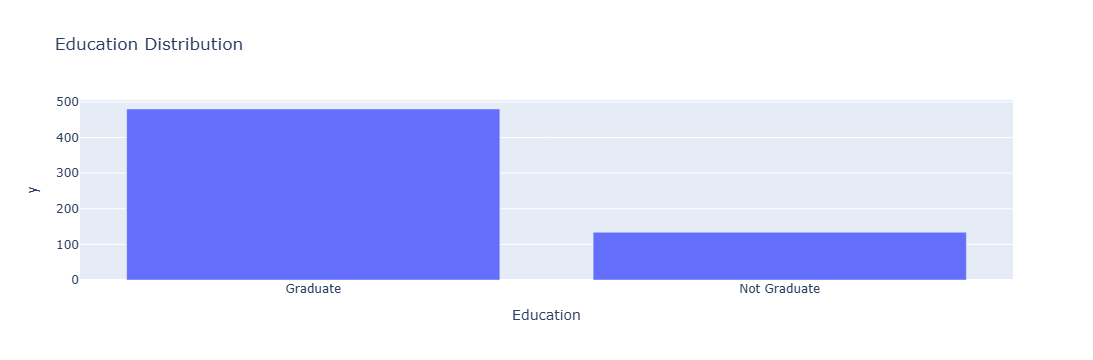

In [22]:
education_count = df['Education'].value_counts()
fig_education = px.bar(education_count, 
                       x=education_count.index, 
                       y=education_count.values, 
                       title='Education Distribution')
fig_education.show()

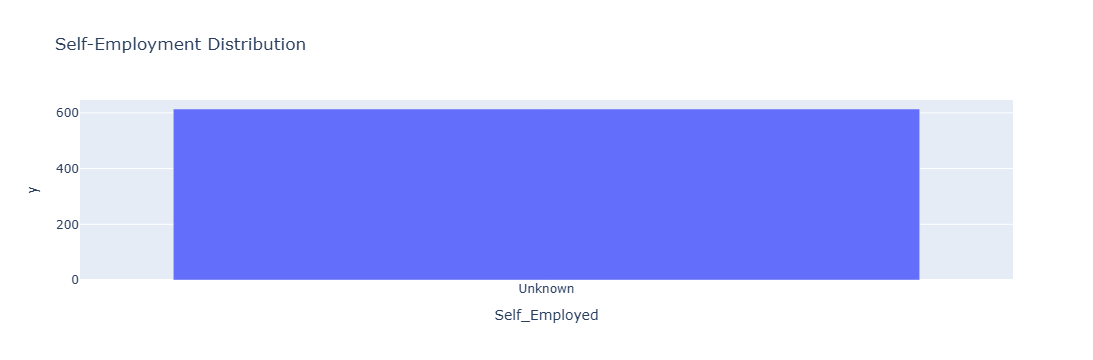

In [23]:
self_employed_count = df['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count, 
                           x=self_employed_count.index, 
                           y=self_employed_count.values, 
                           title='Self-Employment Distribution')
fig_self_employed.show()

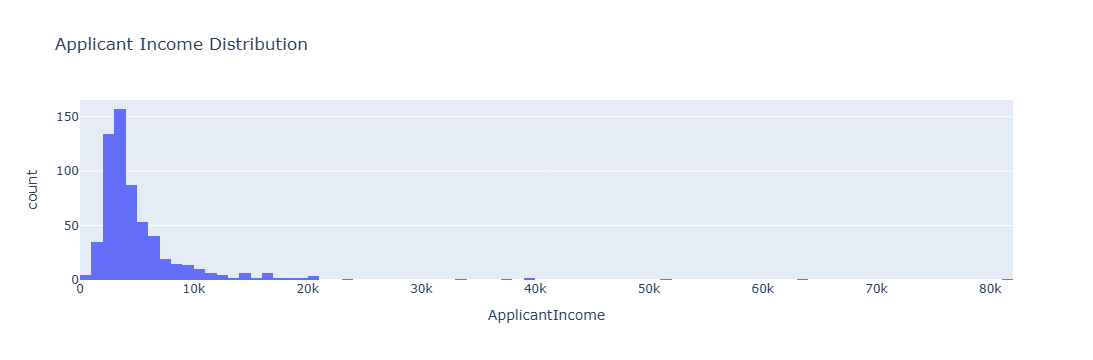

In [24]:
fig_applicant_income = px.histogram(df, x='ApplicantIncome', 
                                    title='Applicant Income Distribution')
fig_applicant_income.show()

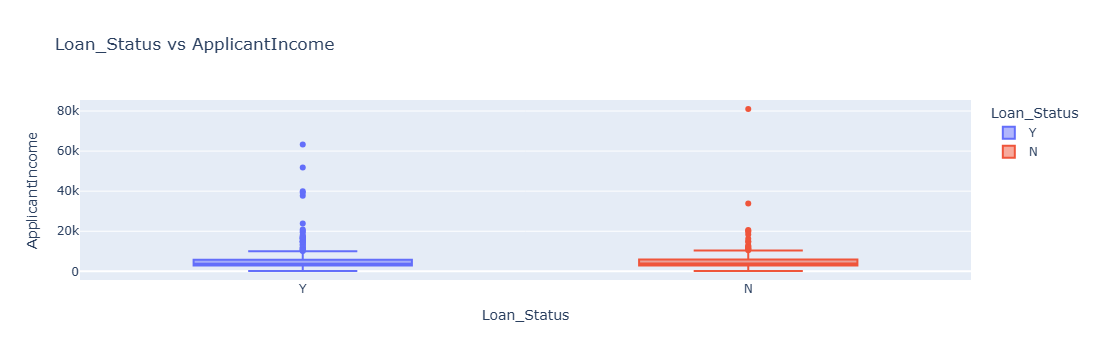

In [26]:
fig_income = px.box(df, x='Loan_Status', 
                    y='ApplicantIncome',
                    color="Loan_Status", 
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

In [27]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

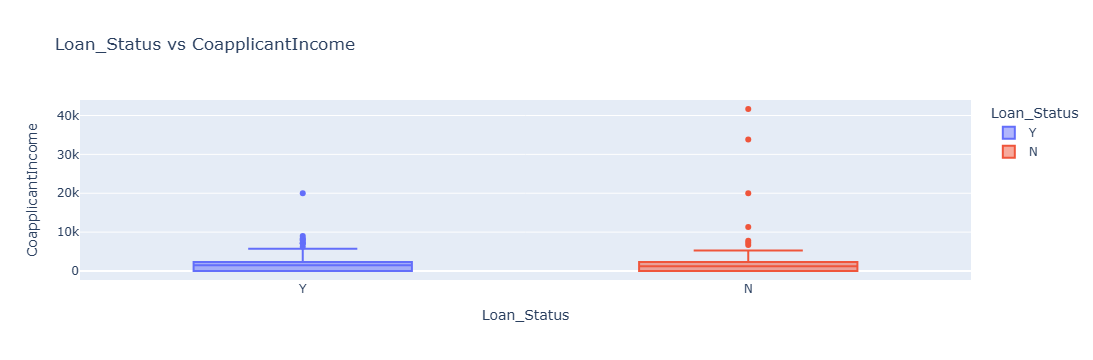

In [28]:
fig_coapplicant_income = px.box(df, 
                                x='Loan_Status', 
                                y='CoapplicantIncome',
                                color="Loan_Status", 
                                title='Loan_Status vs CoapplicantIncome')
fig_coapplicant_income.show()